In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-clusteringg/student_clustering.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-clusteringg/student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


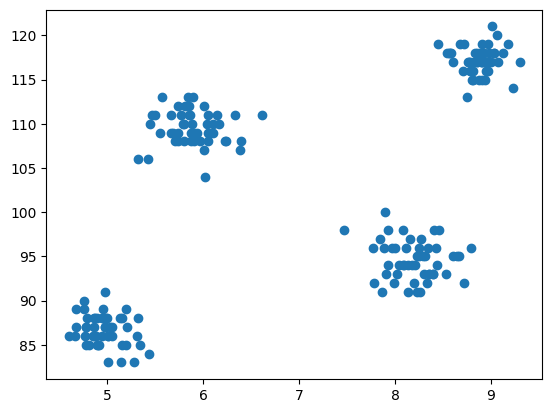

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(df['cgpa'], df['iq'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

In [7]:
wcss

[29957.898288,
 4184.14127,
 2362.713349,
 681.96966,
 514.1616803171114,
 388.8524026875981,
 295.4391895943192,
 234.4868734319922,
 199.99120032567842,
 176.5699329834639]

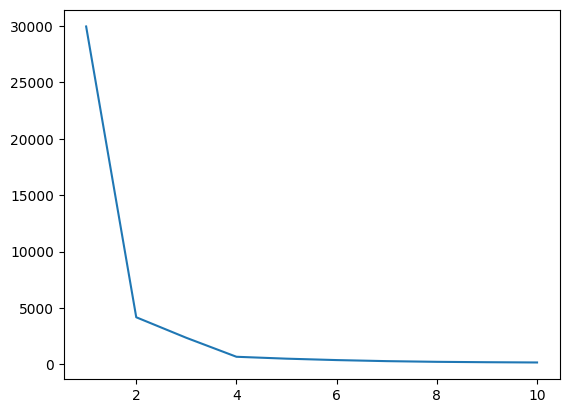

In [8]:
plt.plot(range(1,11), wcss)

4 seems to be the best value of k , where the number of cluster seems to be appropiate 

In [9]:
X = df.iloc[:,:].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
y_means

array([3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 2, 0, 3,
       0, 3, 3, 0, 3, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 3, 2, 3, 0, 0, 3,
       1, 1, 0, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3, 1,
       0, 3, 2, 0, 2, 1, 0, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 3, 1, 3, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 0, 1, 0, 3, 1, 2, 3, 3, 1, 3, 3, 0, 3, 1, 1,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 0, 2,
       3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1,
       3, 0, 2, 1, 2, 0, 3, 1, 2, 0, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 3, 0,
       1, 2, 3, 1, 1, 2, 2, 2, 0, 3, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 2,
       2, 1], dtype=int32)

In [11]:
X[y_means == 3,1]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

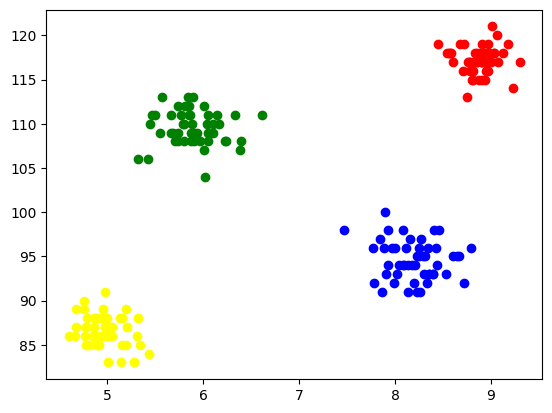

In [12]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color='blue')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color='red')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color='green')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color='yellow')